# 2.4 データのクリーニング

平滑化法の一つである、指数平滑化をPython（pandas）を使って実装する。


In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

データは、航空旅客データを使う。

In [2]:
url_csv = "https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/" \
          "BookRepo/master/Ch02/data/AirPassengers.csv"

air = pd.read_csv(url_csv, parse_dates = True, header = None)
air.columns = ['Date', 'Passengers']
air["Date"] = pd.to_datetime(air.Date, format="%Y-%m")

In [3]:
air.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


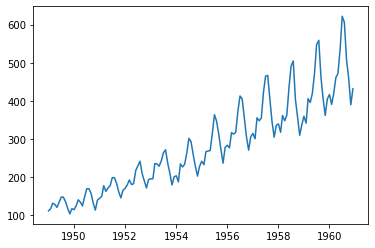

In [4]:
plt.plot(air.Date, air.Passengers);

指数平滑化はpandas.DataFrameのewmを利用

[pandasのドキュメント](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)を確認すると、書籍と以下の点が異なるので注意

- デフォルトでは式が違う
  - 書籍に記載の手法は最も単純な指数平滑化の定義
  - 書籍記載の平滑化にするには、`adjust=False`を指定する
- パラメータ`alpha`は時刻tの観測値にかかる計数
  - `alpha`が大きければ、過去の影響が小さいと考える（観測値に近い）
  - 逆に`alpha`が小さければ、過去の影響に大きく影響される（滑らかになる）

In [5]:
air['Smooth.5'] = air.ewm(alpha=0.5).mean().Passengers
air['Smooth.1'] = air.ewm(alpha=0.1,).mean().Passengers
air['Smooth.9'] = air.ewm(alpha=0.9,).mean().Passengers

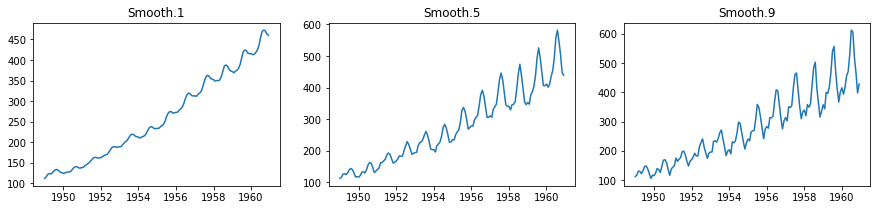

In [6]:
fig = plt.figure(figsize=(15, 3))
ax_lst = fig.subplots(1, 3)

ax = ax_lst[0]
ax.plot(air.Date, air['Smooth.1']);
ax.set_title("Smooth.1");

ax = ax_lst[1]
ax.plot(air.Date, air['Smooth.5']);
ax.set_title("Smooth.5");

ax = ax_lst[2]
ax.plot(air.Date, air['Smooth.9']);
ax.set_title("Smooth.9");